For identityfying which variables are significant in predicting the price of a houst, and how well thos variables describe the price of house we will performing following steps<br>
    **Data Exploration and Cleaning**: Load the data, understand its structure, and clean it if necessary.<br>
    **Feature Engineering**: Prepare the data for modeling by selecting or transforming variables.<br>
    **Model Building**: Build regression models, including Ridge and Lasso regression, to predict house prices.<br>
    **Variable Significance**: Identify which variables are significant in predicting the price of a house.<br>
    **Model Evaluation**: Evaluate the models to determine how well the variables describe the price of a house.<br>
    **Optimal Lambda**: Determine the optimal values of lambda for Ridge and Lasso regression.<br>

### Data Exploration and Cleaning

In [138]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


In [139]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The dataset contains 81 columns, including the target variable SalePrice. The other columns represent various features, such as lot size, neighborhood, building type, etc.

Exploratory Data Analysis (EDA) is a crucial step to understand the data before any modeling work. Here's how we'll proceed:

I.  **Data Overview**: Basic statistics and types of data.

II. **Missing Value Analysis**: Identify and deal with missing values.

III.**Univariate Analysis**: Understand the distribution of individual variables.

IV. **Bivariate Analysis**: Explore the relationship between the variables and the target (SalePrice).

V.  **Correlation Analysis**: Understand how different numerical variables relate to each other.

### Data Overview
We'll look at the shape of the dataset, the data types of the variables, and some basic statistics.

In [140]:
df.shape

(1460, 81)

The dataset has 1,460 rows and 81 columns.

In [141]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Columns like Id and MSSubClass are of type int64.

Columns like MSZoning are of type object, indicating they are categorical.

Columns like LotFrontage are of type float64, indicating they are numerical.

In [142]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The average sale price (SalePrice) is approximately $180,921 with a standard deviation of approximately $79,442.<br>
The minimum sale price is $34,900, and the maximum is not shown in the summary.<br>
Other numerical features also show varying scales and distributions.<br>

### Missing Value Analysis

In [143]:
missing_values = df.isnull().sum()
missing_values_filtered = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values_filtered

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Several columns have missing values.
Features related to amneties like swimming pools, alleys, fences, etc, have a large number of missing values.<br>

For handling missing values, we can take either of following approach<br>
    **Drop Columns**: If a columns has hight percentage of missing values, it might be best to drop it.<br>
    **Impute Values**: For columns with numerical data, we can impute missing values with mean, median, or a statistical method. For categorical data, we can use the mode or specific category to denote missing information.

### Drop Columns with High Percentage of Missing Values

In [144]:
missing_percentage = (missing_values_filtered / df.shape[0]) * 100
threshold = 40.0
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
df_dropped = df.drop(columns=columns_to_drop)
columns_to_drop, missing_percentage

(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'],
 PoolQC          99.520548
 MiscFeature     96.301370
 Alley           93.767123
 Fence           80.753425
 MasVnrType      59.726027
 FireplaceQu     47.260274
 LotFrontage     17.739726
 GarageType       5.547945
 GarageYrBlt      5.547945
 GarageFinish     5.547945
 GarageQual       5.547945
 GarageCond       5.547945
 BsmtFinType2     2.602740
 BsmtExposure     2.602740
 BsmtFinType1     2.534247
 BsmtCond         2.534247
 BsmtQual         2.534247
 MasVnrArea       0.547945
 Electrical       0.068493
 dtype: float64)

We have decided to drop columns with more than 40% missing values.
The columns that were dropped are PoolQC, MiscFeature, Alley, Fence, and FireplaceQu.

###  Impute Missing Values for Remaining Columns

In [145]:
missing_num_cols = [col for col in missing_values_filtered.index if df[col].dtype != 'object']
missing_cat_cols = [col for col in missing_values_filtered.index if df[col].dtype == 'object']

missing_num_cols = [col for col in missing_num_cols if col not in columns_to_drop]
missing_cat_cols = [col for col in missing_cat_cols if col not in columns_to_drop]

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df_dropped[missing_num_cols] = num_imputer.fit_transform(df_dropped[missing_num_cols])
df_dropped[missing_cat_cols] = cat_imputer.fit_transform(df_dropped[missing_cat_cols])

df_dropped.isnull().sum().sum()

0

We have successfully imputed all missing values, and the dataset now contain Zero missing values.

### Univariate Analysis of Numerical Variables


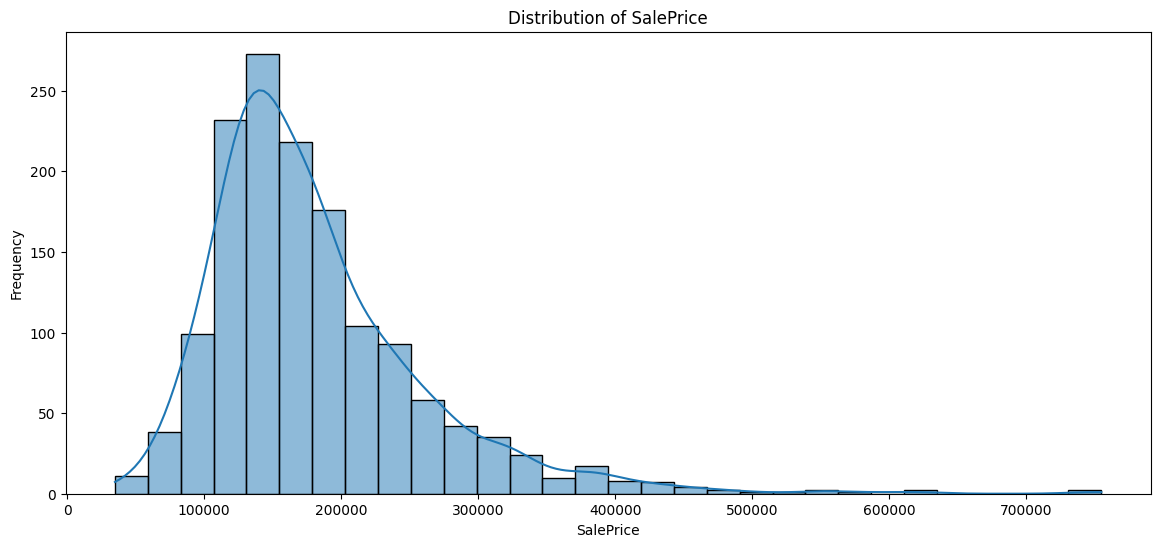

In [146]:
plt.figure(figsize=(14, 6))

sns.histplot(df_dropped['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

plt.show()

The distribution appears to be right-skewed, meaning that most of the houses are sold at a price below the average, but there are some houses with extremely high prices. <br>
The presence of a long tail on the right side suggests potential outliers at the higher end of the price spectrum.

To get a better sense of the numerical variables in the dataset, we'll look at the distribution of some key numerical features. These can include aspects like LotArea, OverallQual, GrLivArea, and others that are often considered important in the context of real estate.

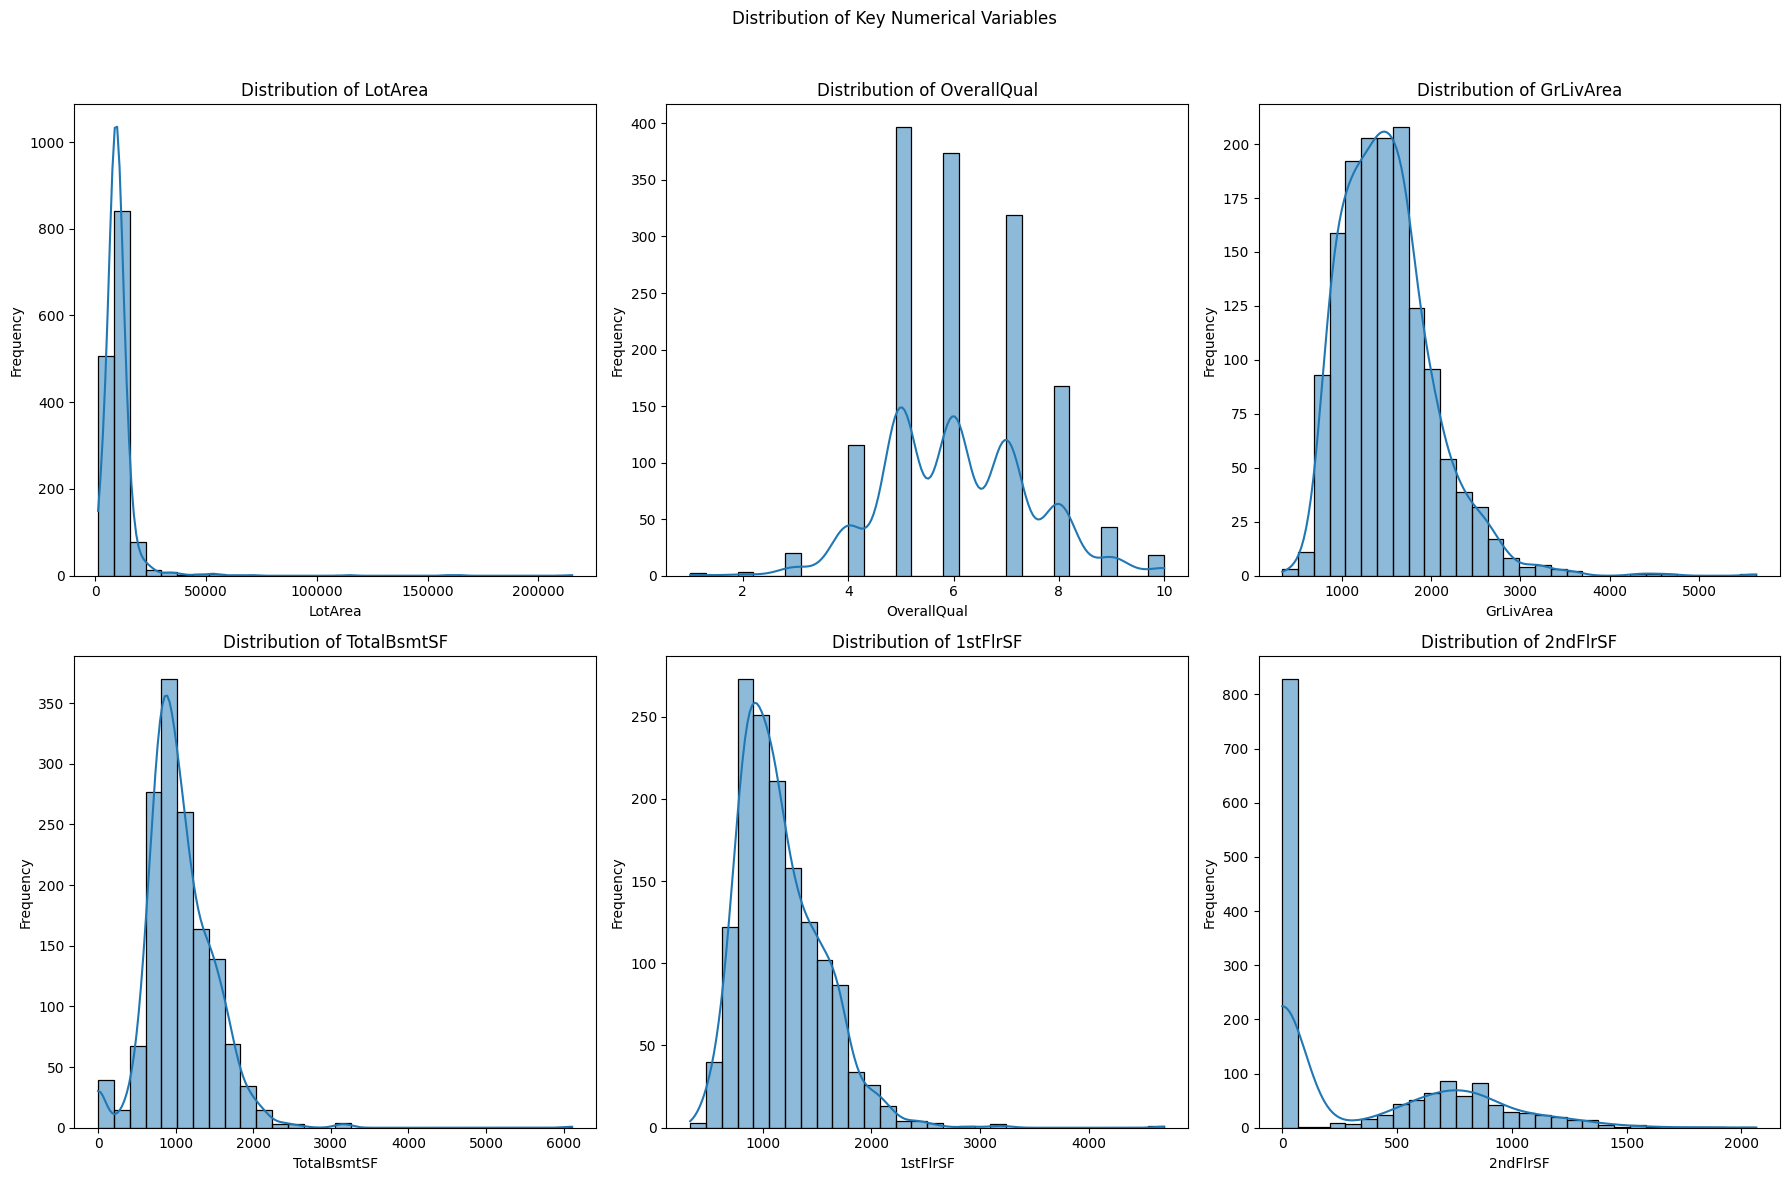

In [147]:
key_numerical_vars = ['LotArea', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Key Numerical Variables')

for i, var in enumerate(key_numerical_vars):
    row = i // 3
    col = i % 3
    sns.histplot(df_dropped[var], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**LotArea**: The distribution is highly skewed to the right, indicating that most properties have smaller lot areas, with a few exceptions having extremely large lot areas.

**OverallQual**: This variable, which likely represents the overall quality of a house, shows a near-normal distribution but leans slightly towards higher quality levels.

**GrLivArea**: The above-ground living area also shows a right-skewed distribution, similar to LotArea.

**TotalBsmtSF**: The total basement area seems to be right-skewed as well, with most houses having smaller basements.

**1stFlrSF**: The first-floor square footage is right-skewed, similar to other area-related variables.

**2ndFlrSF**: A significant number of houses appear to have no second floor (0 square footage), and the rest show a right-skewed distribution.

### Univariate Analysis of Categorical Variables

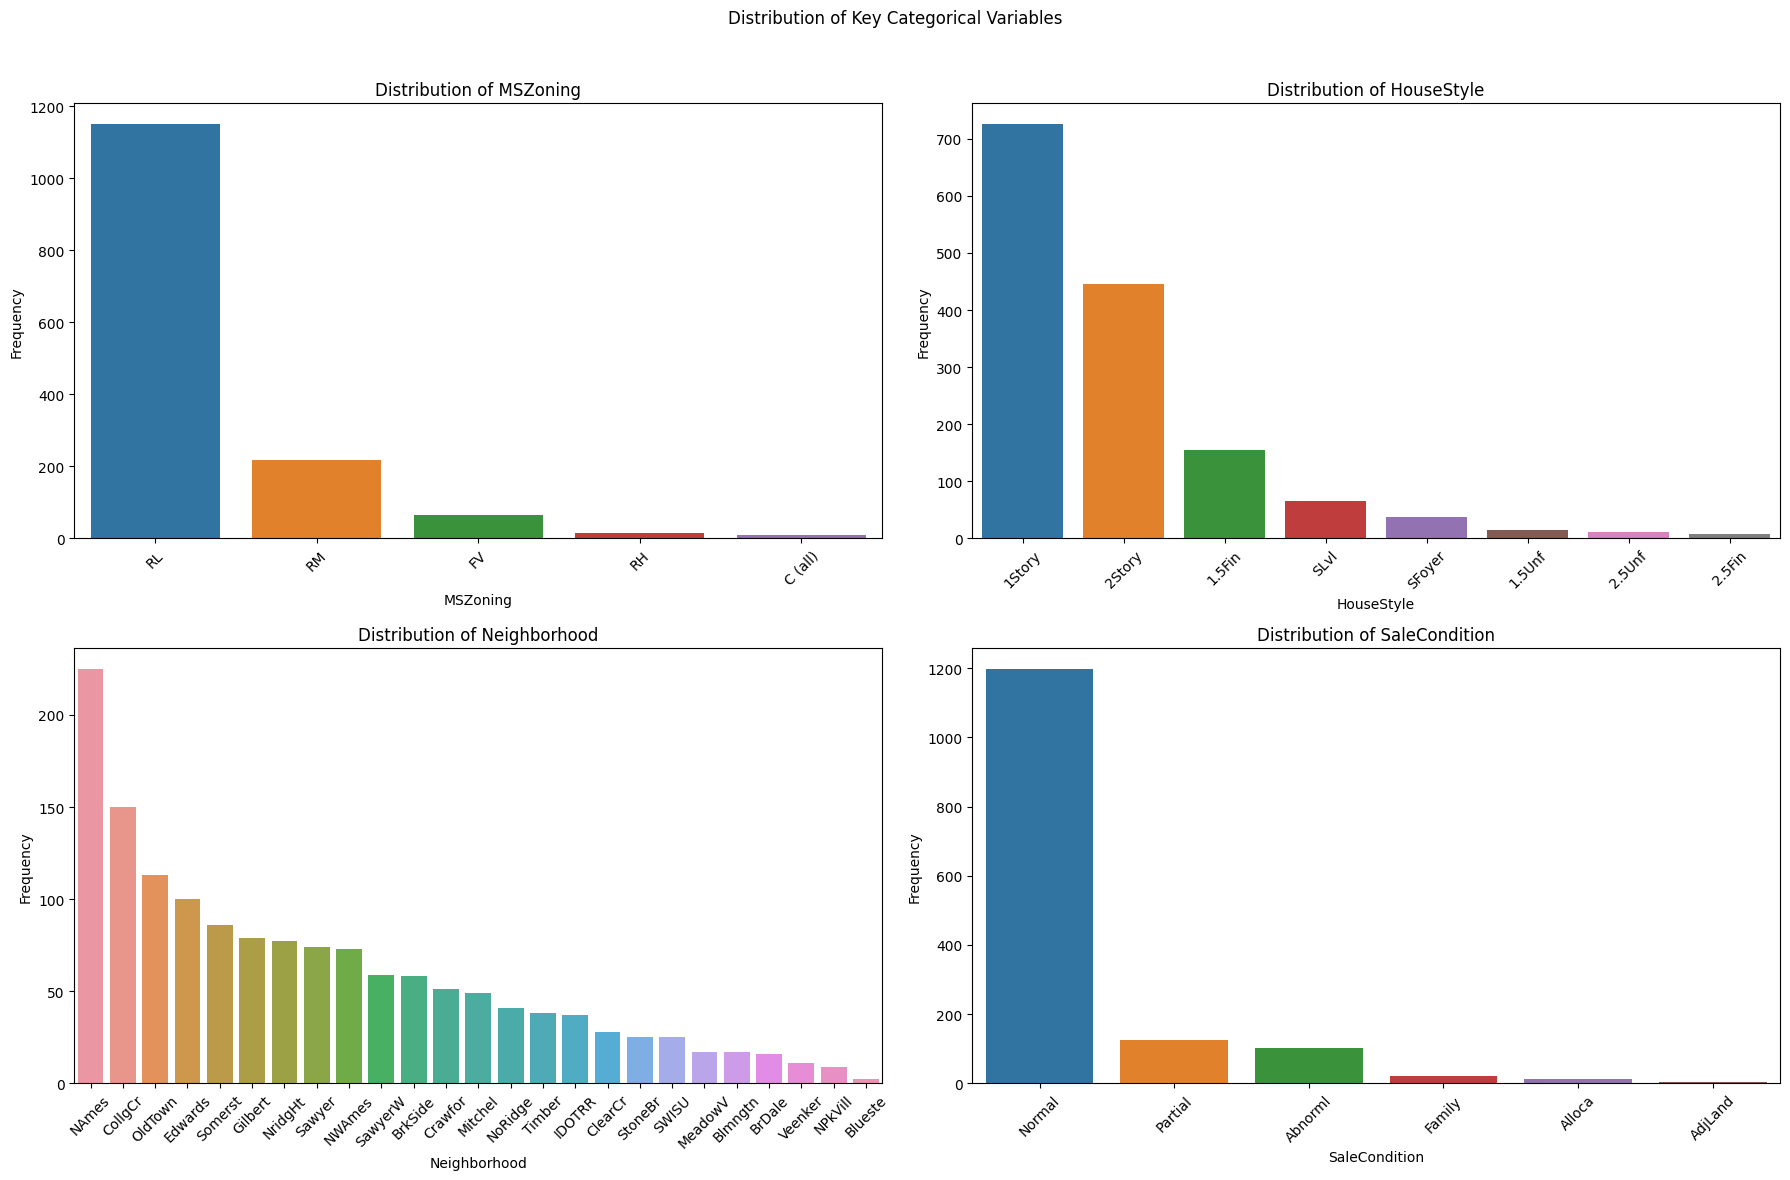

In [148]:
key_categorical_vars = ['MSZoning', 'HouseStyle', 'Neighborhood', 'SaleCondition']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Categorical Variables')

for i, var in enumerate(key_categorical_vars):
    row = i // 2
    col = i % 2
    sns.countplot(data=df_dropped, x=var, ax=axes[row, col], order=df_dropped[var].value_counts().index)
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**MSZoning**: The majority of houses are in residential low-density zones (RL). A smaller portion are in residential medium-density zones (RM).

**HouseStyle**: Most houses are either 1-story or 2-story. Other styles like 1.5Fin and SLvl are less common.

**Neighborhood**: Some neighborhoods are more represented in the dataset than others. Neighborhoods like NAmes, CollgCr, and OldTown have more houses listed.

**SaleCondition**: The majority of sales are under normal conditions. Other conditions like Partial, Abnorml, and Family occur less frequently.

### Bivariate Analysis of Numerical Variables with SalePrice

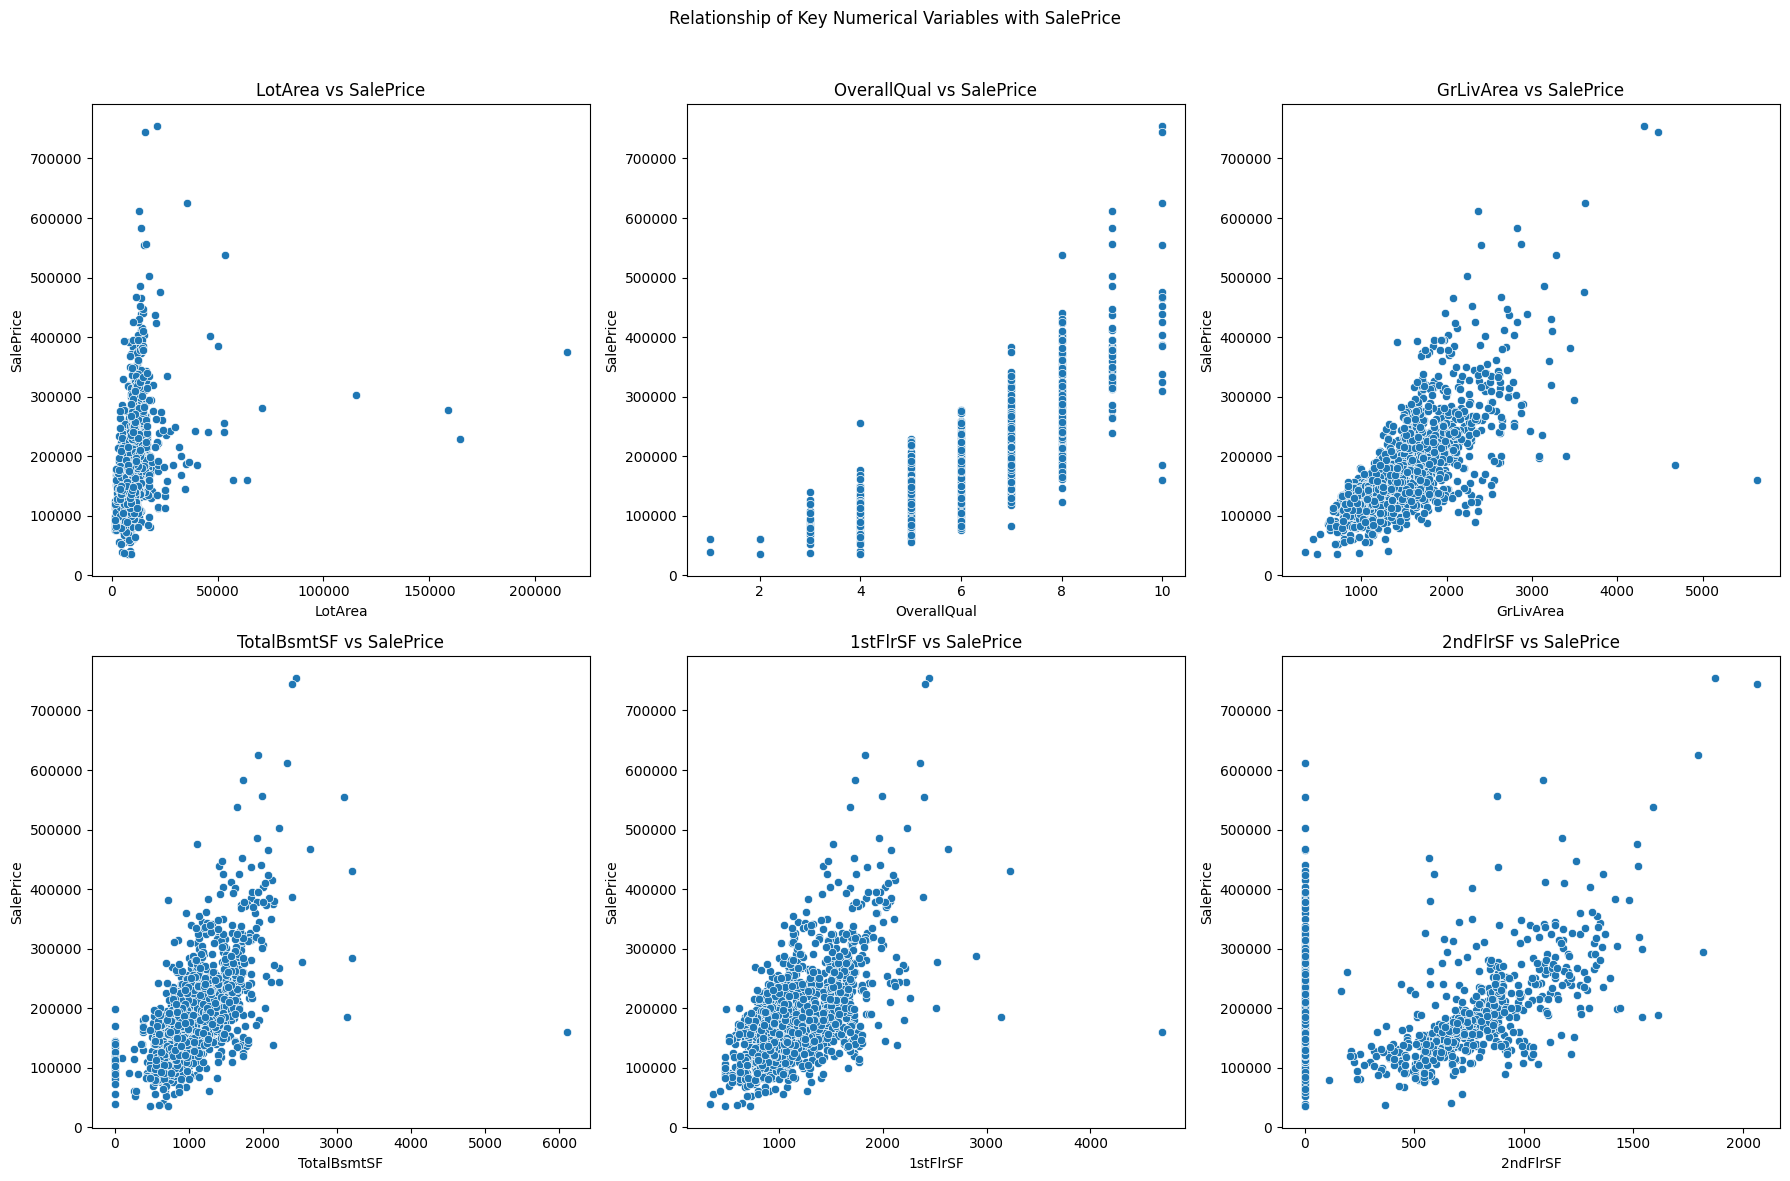

In [149]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Relationship of Key Numerical Variables with SalePrice')

for i, var in enumerate(key_numerical_vars):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df_dropped, x=var, y='SalePrice', ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs SalePrice')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('SalePrice')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**LotArea vs SalePrice**: There's a general trend of higher prices for larger lots, but the relationship doesn't seem very strong. There are some potential outliers as well.

**OverallQual vs SalePrice**: There's a strong positive relationship between the overall quality and the sale price. Higher quality usually results in a higher price.

**GrLivArea vs SalePricev**: Similar to OverallQual, the above-ground living area also has a strong positive relationship with the sale price.

**TotalBsmtSF vs SalePrice**: The total basement area has a good positive correlation with the sale price, though there are some properties with large basements but moderate prices.

**1stFlrSF vs SalePrice**: The first-floor area also shows a positive trend with the sale price.

**2ndFlrSF vs SalePrice**: The second-floor area seems to have less influence on the sale price compared to the first-floor area.

### Bivariate Analysis of Categorical Variables with SalePrice

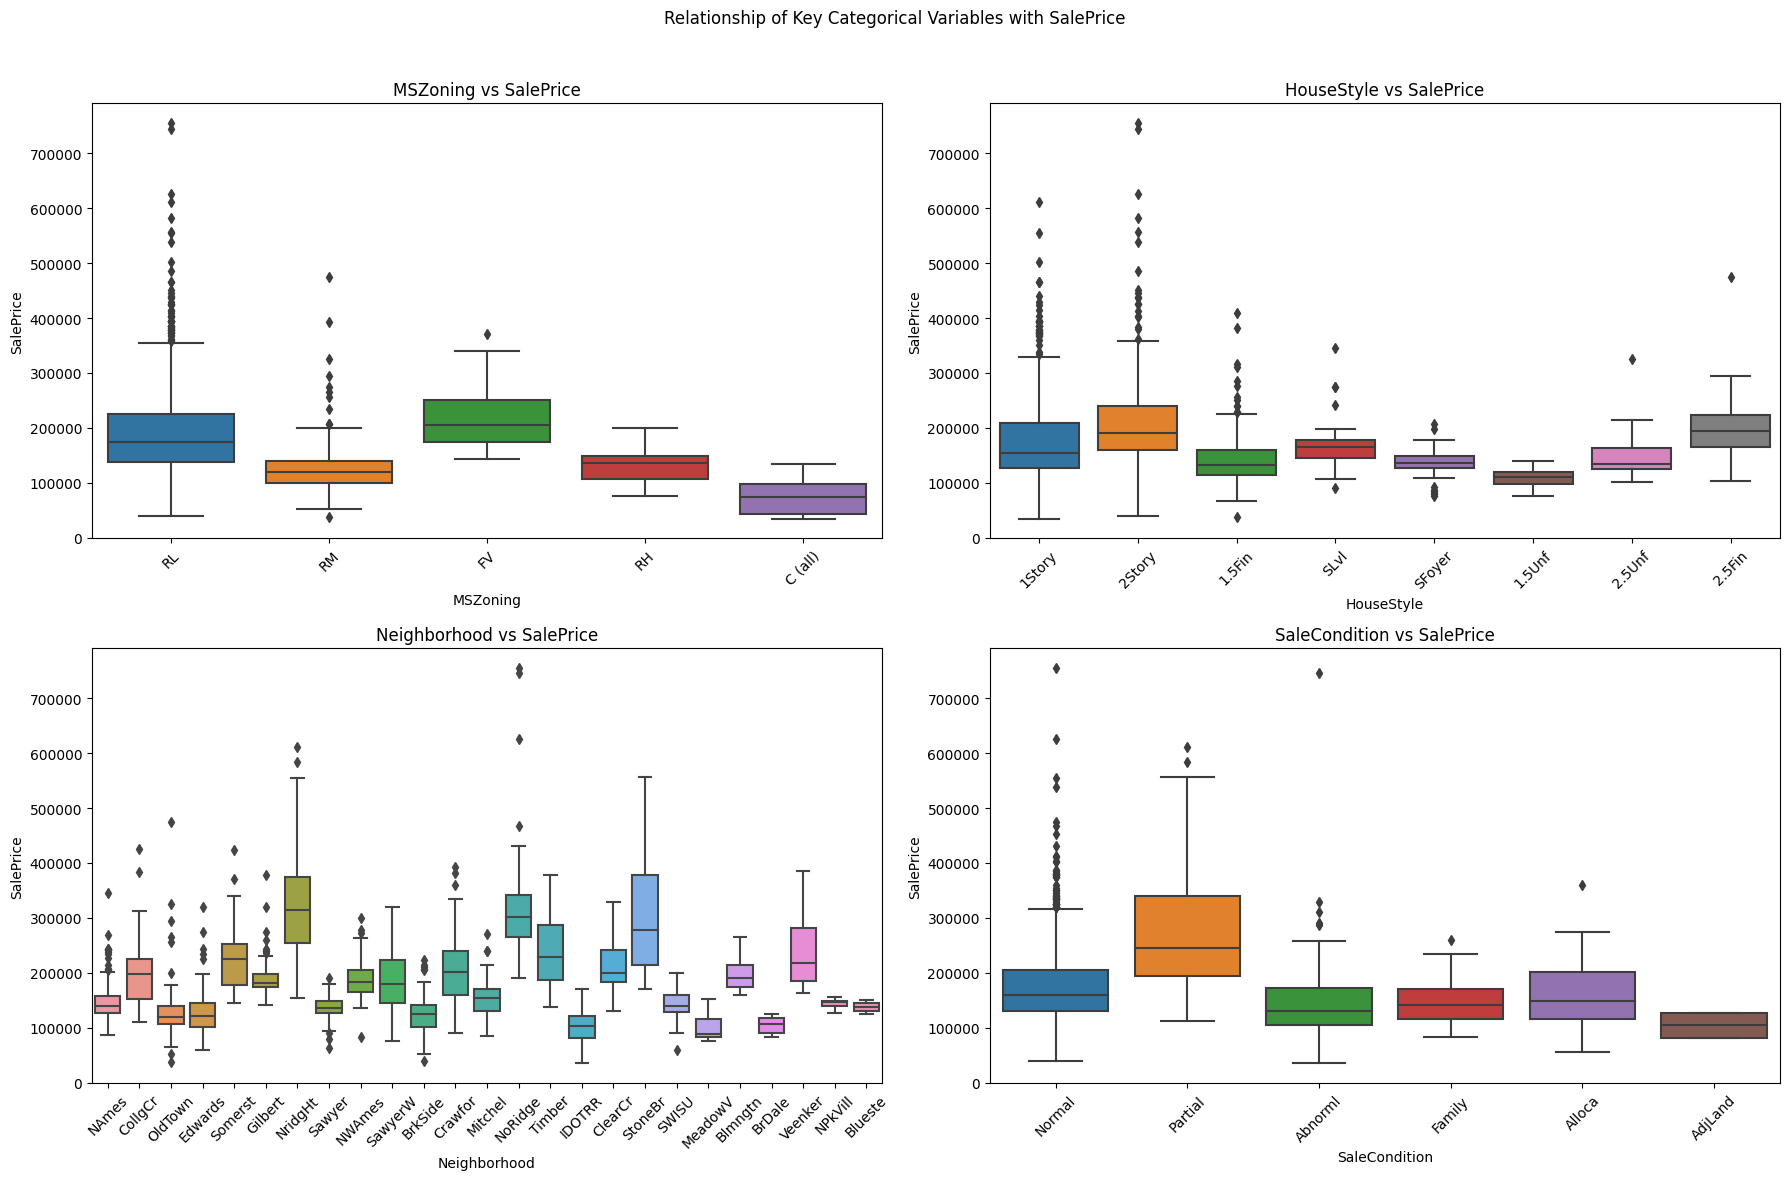

In [150]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Relationship of Key Categorical Variables with SalePrice')

for i, var in enumerate(key_categorical_vars):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df_dropped, x=var, y='SalePrice', ax=axes[row, col], order=df_dropped[var].value_counts().index)
    axes[row, col].set_title(f'{var} vs SalePrice')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('SalePrice')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**MSZoning vs SalePrice**: Houses in FV and RL zones tend to have higher sale prices compared to other zoning classifications like RM and RH.

**HouseStyle vs SalePrice**: Houses with style 2.5Fin appear to have higher median sale prices, followed by 2Story houses. The box plot also shows some outliers in different house styles.

**Neighborhood vs SalePrice**: The sale price varies significantly across neighborhoods. Areas like NoRidge, NridgHt, and StoneBr seem to command higher prices.

**SaleCondition vs SalePrice**: Houses sold under Partial conditions (perhaps newly built or renovated) generally have higher sale prices. The Normal and Abnorml conditions show a wide range of sale prices.

### Correlation Analysis

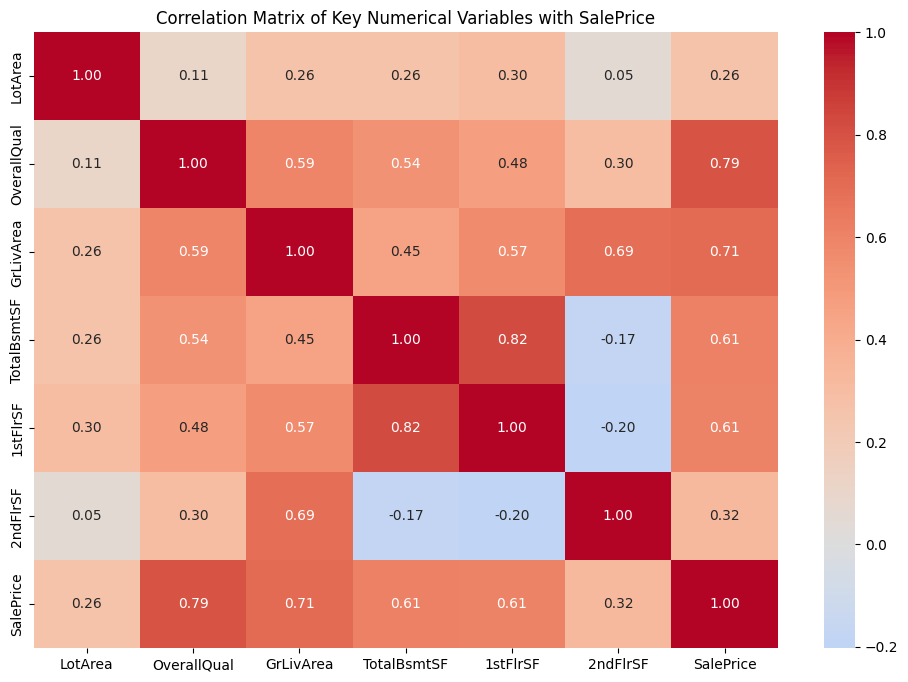

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [151]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.loc[key_numerical_vars + ['SalePrice'], key_numerical_vars + ['SalePrice']], 
            annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Correlation Matrix of Key Numerical Variables with SalePrice')
plt.show()

correlation_with_target

**Highly Positive Correlations with SalePrice**:

    OverallQual (0.79)
    GrLivArea (0.71)
    TotalBsmtSF (0.61)
    1stFlrSF (0.61)
    These variables are strongly positively correlated with SalePrice, meaning as they increase, the sale price generally also increases.

**Moderate and Low Correlations**:

    2ndFlrSF has a correlation of 0.32, and LotArea has a correlation of 0.26 with SalePrice.



To achieve the business goal and answer the specific questions posed by the company, we'll follow these steps:<br>
    **Data Preprocessing**: Prepare the data for modeling, including encoding categorical variables and scaling numerical variables.<br>
    **Feature Selection**: Identify the most significant variables using techniques such as LASSO regression.<br>
    **Model Building**: Build Ridge and Lasso regression models.<br>
    **Optimal Lambda**: Determine the optimal value of lambda (regularization parameter) for Ridge and Lasso regressions.<br>
    **Model Evaluation**: Assess how well the selected variables describe the price of a house.<br>

### Data Preprocessing

**Encoding Categorical Variables**: We'll use one-hot encoding to convert categorical variables into a format that can be provided to machine learning algorithms.<br>

**Scaling Numerical Variables**: Standardizing the numerical variables is essential, especially when we are using regularization techniques like Ridge and Lasso.

In [152]:
df_dropped.drop(columns=['Id'], inplace=True)

X = df_dropped.drop(columns=['SalePrice'])
y = df_dropped['SalePrice']

num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

num_transformer = StandardScaler()

cat_transformer = OneHotEncoder(handle_unknown='ignore')

X_num_transformed = num_transformer.fit_transform(df_dropped[num_cols])
X_cat_transformed = cat_transformer.fit_transform(df[cat_cols])

shape_num_transformed = X_num_transformed.shape
shape_cat_transformed = X_cat_transformed.shape

shape_num_transformed, shape_cat_transformed

((1460, 36), (1460, 240))

In [153]:
cat_feature_names = ( cat_transformer.get_feature_names_out(input_features=cat_cols))
all_feature_names = num_cols + cat_feature_names.tolist()

X_concatenated = np.hstack([X_num_transformed, X_cat_transformed.toarray()])
shape_concatenated = X_concatenated.shape

X_transformed_df = pd.DataFrame(X_concatenated, columns=all_feature_names)

shape_concatenated, X_transformed_df.head()

((1460, 276),
    MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
 0    0.073375    -0.220875 -0.207142     0.651479    -0.517200   1.050994   
 1   -0.872563     0.460320 -0.091886    -0.071836     2.179628   0.156734   
 2    0.073375    -0.084636  0.073480     0.651479    -0.517200   0.984752   
 3    0.309859    -0.447940 -0.096897     0.651479    -0.517200  -1.863632   
 4    0.073375     0.641972  0.375148     1.374795    -0.517200   0.951632   
 
    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
 0      0.878668    0.514104    0.575425   -0.288653  ...             0.0   
 1     -0.429577   -0.570750    1.171992   -0.288653  ...             0.0   
 2      0.830215    0.325915    0.092907   -0.288653  ...             0.0   
 3     -0.720298   -0.570750   -0.499274   -0.288653  ...             0.0   
 4      0.733308    1.366489    0.463568   -0.288653  ...             0.0   
 
    SaleType_New  SaleType_Oth  SaleType_WD  SaleCon

The categorical variables have been one-hot encoded, resulting in a total of 267 features after preprocessing.<br>
The numerical variables have been standardized.<br>

In the Model Building step, we'll focus on the following:

**Baseline Model**: We'll start by building a simple linear regression model to serve as our baseline.<br>
**Ridge Regression**: We'll build a Ridge regression model and tune the lambda (also known as α) parameter.<br>
**Lasso Regression**: We'll build a Lasso regression model and tune the lambda parameter.<br>
**Variable Significance**: We'll identify which variables are significant in predicting the price of a house.<br>

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_concatenated, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

rmse_baseline = math.sqrt(mean_squared_error(y_test, y_pred))
r2_baseline = r2_score(y_test, y_pred)

rmse_baseline, r2_baseline

(84792446710425.62, -9.373472294311991e+17)

The results indicate extremely high values for the Root Mean Square Error (RMSE) and a very low R^2  score, suggesting that the baseline linear regression model is not performing well. This could be due to overfitting, multicollinearity, or other issues with the data.

Given these results, it's crucial to explore regularization techniques like Ridge and Lasso regression, which can help control overfitting and handle multicollinearity.

### Ridge Regression
Ridge Regression adds a penalty term to the linear regression objective, which helps in reducing the complexity of the model. The penalty term is controlled by a parameter λ (also known as α).

When λ=0: Ridge Regression becomes simple Linear Regression.<br>
When λ is very large: The penalty term dominates, leading to a model with smaller coefficients.<br>

We'll use cross-validation to find the optimal λ value for Ridge Regression.

In [155]:
alphas_ridge = np.logspace(-6, 6, 13)

ridge_cv = RidgeCV(alphas=alphas_ridge, store_cv_values=True)

ridge_cv.fit(X_train, y_train)

best_alpha_ridge = ridge_cv.alpha_
best_cv_score_ridge = np.mean(ridge_cv.cv_values_, axis=0)[np.isclose(ridge_cv.alphas, best_alpha_ridge)]

y_pred_ridge = ridge_cv.predict(X_test)

rmse_ridge = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

best_alpha_ridge, best_cv_score_ridge, rmse_ridge, r2_ridge

(10.0, array([1.17055988e+09]), 30396.13200892372, 0.8795455608865506)

The Ridge Regression model performed as follows:

Best α (Lambda): 10.0<br>
Best Cross-Validation Score: 1.17 × 10^9<br>
Root Mean Square Error (RMSE): 30,396.13<br>
R^2  Score: 0.879<br>

The Ridge Regression model significantly outperformed the baseline model, with a high R^2 score and a much lower RMSE.

Next, let's move on to Lasso Regression to see if it performs similarly or better and to identify which features are the most significant.

### Lasso Regression
Lasso (Least Absolute Shrinkage and Selection Operator) Regression is another regularization technique that not only helps in reducing overfitting but can also be used for feature selection. Like Ridge Regression, Lasso also has a penalty term controlled by λ (or α).<br>

We'll use cross-validation to find the optimal λ value for Lasso Regression.

In [156]:
alphas_lasso = np.logspace(-6, 6, 13)

lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42)

lasso_cv.fit(X_train, y_train)

best_alpha_lasso = lasso_cv.alpha_

y_pred_lasso = lasso_cv.predict(X_test)

rmse_lasso = math.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

best_alpha_lasso, rmse_lasso, r2_lasso

(100.0, 28176.871259821928, 0.8964925281471526)

Best α (Lambda): 100.0<br>
Root Mean Square Error (RMSE): 28,176.87<br>
R^2 Score: 0.896<br>

The Lasso Regression model also performs significantly better than the baseline model and has a slightly better R^2 score compared to the Ridge Regression model.

Next, let's identify which variables are significant in predicting the price of a house, as determined by the Lasso model

In [157]:
lasso_coef = lasso_cv.coef_

lasso_coef_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': lasso_coef})

significant_features_lasso = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]

significant_features_lasso['abs_coef'] = significant_features_lasso['Coefficient'].abs()
significant_features_lasso = significant_features_lasso.sort_values(by='abs_coef', ascending=False).drop(columns=['abs_coef'])

significant_features_lasso.head(10)

,Feature,Coefficient
122,RoofMatl_ClyTile,-413999.235144
99,Condition2_PosN,-124549.904030
83,Neighborhood_StoneBr,35251.675879
76,Neighborhood_NoRidge,34092.741741
224,KitchenQual_Ex,25152.561312
15,GrLivArea,23427.512481
176,BsmtQual_Ex,21766.091738
77,Neighborhood_NridgHt,21520.598424
133,Exterior1st_BrkFace,19683.784140
187,BsmtExposure_Gd,14633.854127


The table above shows the top 10 significant features in predicting the price of a house, as determined by the Lasso Regression model. The features are sorted by the absolute value of their coefficients.

Roof Material (ClyTile) and Condition2 (PosN) have negative coefficients, suggesting that these features negatively impact the house price.<br>
Features like Neighborhood (StoneBr, NoRidge, NridgHt) and Kitchen Quality (Ex) positively influence the house price.<br>

Summary
Best α (Lambda) for Ridge: 10.0<br>
Best α (Lambda) for Lasso: 100.0<br>
Significant Features: Determined by Lasso Regression<br>
Both Ridge and Lasso regression models performed well, with R^2 scores around 0.88 and 0.90, respectively